In [1]:
import pandas as pd

In [6]:
dataset = pd.read_csv("Preplacementdata.csv")

In [7]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [8]:
import seaborn as sns

In [9]:
#!pip install seaborn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16252\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

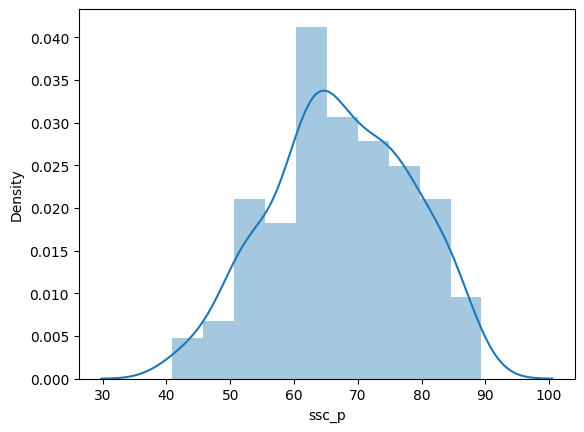

In [10]:
#distplot - used for distribution of numerical feature - ssc_p
sns.distplot(dataset["ssc_p"])

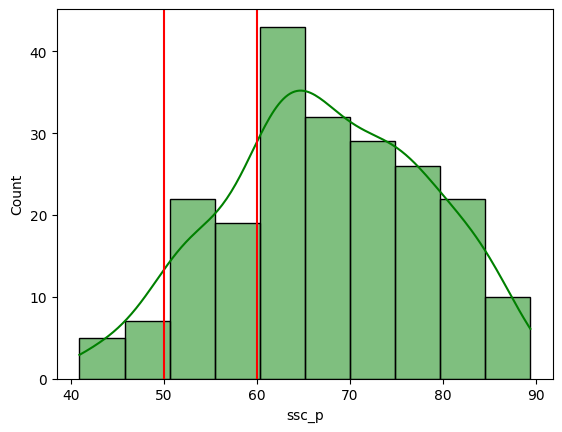

In [12]:
from matplotlib import pyplot
from scipy.stats import norm
import seaborn as sns
#displot is deprecated so used histplot and defining colors of the histogram
ax = sns.histplot(dataset["ssc_p"],kde=True,color='Green')
#axvline - drawing vertical line at start range and end range with color red
pyplot.axvline(50,color='Red')
pyplot.axvline(60,color='Red')
#pyplot.axvline(startrange,color='Red')
#pyplot.axvline(endrange,color='Red')

In [14]:
#generate a sample
sample = dataset["ssc_p"]
# calculate parameters
sample_mean =sample.mean()
sample_std = sample.std()
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the normal distribution
dist = norm(sample_mean, sample_std)

Mean=67.303, Standard Deviation=10.827


In [15]:
# sample probabilities for a range of outcomes
#values = [value for value in range(startrange, endrange)]
values = [value for value in range(50, 60)]

In [16]:
values

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

In [19]:
for value in range(50,60):
    print(value)

50
51
52
53
54
55
56
57
58
59


In [20]:
values=[]
for value in range(50,60):
    values.append(value)

In [21]:
values

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

In [23]:
#creating probability densities
probabilities = [dist.pdf(value) for value in values]
probabilities

[0.010275148846718499,
 0.011858764583155554,
 0.013570194930153937,
 0.015396713811418094,
 0.01732069447798158,
 0.019319588759641553,
 0.021366125100358083,
 0.023428741938312646,
 0.025472260251149254,
 0.027458784613159832]

In [24]:
#from scipy.stats import norm
#pdf function from scipy stats
probabilities=[]
for value in values:
    value = dist.pdf(value)
    probabilities.append(value)
probabilities

[0.010275148846718499,
 0.011858764583155554,
 0.013570194930153937,
 0.015396713811418094,
 0.01732069447798158,
 0.019319588759641553,
 0.021366125100358083,
 0.023428741938312646,
 0.025472260251149254,
 0.027458784613159832]

In [25]:
#sum of all the values in the probabilities list
prob=sum(probabilities)

In [26]:
prob

0.18546701731204907

In [27]:
#printing the values
#print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
print("The area between range({},{}):{}".format(50,60,sum(probabilities)))

The area between range(50,60):0.18546701731204907


In [34]:
#converting this into a function
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.histplot(dataset,kde=True,color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
# generate a sample
    sample = dataset
# calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the distribution
    dist = norm(sample_mean, sample_std)
        
# sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
        

Mean=198702.326, Standard Deviation=154780.927
The area between range(200000,300000):0.24024731161501459


0.24024731161501459

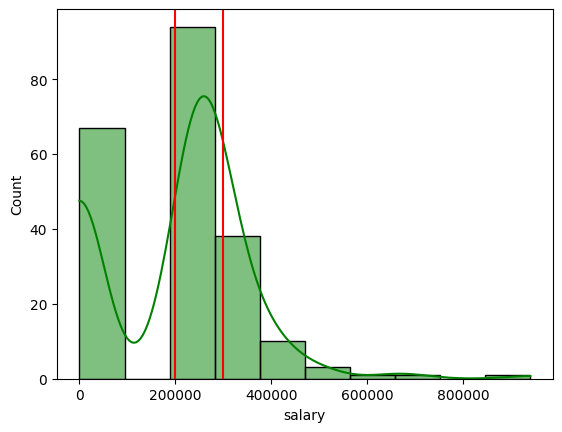

In [37]:
get_pdf_probability(dataset["salary"],200000,300000)

In [38]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------------

In [40]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['salary'])
ecdf(300000)

0.8697674418604651

In [55]:
#converting it to Standard Normal Distribution
mean=dataset["hsc_p"].mean()
std=dataset["hsc_p"].std()
values=[]
for i in dataset["hsc_p"]:
    values.append(i)
values


[91.0,
 78.33,
 68.0,
 52.0,
 73.6,
 49.8,
 49.2,
 64.0,
 79.0,
 70.0,
 61.0,
 68.4,
 55.0,
 87.0,
 47.0,
 75.0,
 66.2,
 67.0,
 66.0,
 67.0,
 65.0,
 76.0,
 60.8,
 60.0,
 97.7,
 54.6,
 79.0,
 67.0,
 76.5,
 67.0,
 73.5,
 53.0,
 81.0,
 65.0,
 51.0,
 78.0,
 44.0,
 76.0,
 58.0,
 68.0,
 77.0,
 63.16,
 39.0,
 87.0,
 73.0,
 64.0,
 71.98,
 60.0,
 62.0,
 37.0,
 73.2,
 61.12,
 45.83,
 70.0,
 60.0,
 66.6,
 71.4,
 76.0,
 62.0,
 65.58,
 70.0,
 73.4,
 64.2,
 70.0,
 73.0,
 47.0,
 74.0,
 78.5,
 47.0,
 73.0,
 61.0,
 70.29,
 67.0,
 83.83,
 64.8,
 62.0,
 70.4,
 80.0,
 90.9,
 62.0,
 62.0,
 63.0,
 67.0,
 79.0,
 63.0,
 89.83,
 63.0,
 51.0,
 62.0,
 75.0,
 90.0,
 57.0,
 69.0,
 62.0,
 62.0,
 78.0,
 70.0,
 62.5,
 73.0,
 82.0,
 57.0,
 72.0,
 61.0,
 78.0,
 63.0,
 64.0,
 50.0,
 90.0,
 82.0,
 63.0,
 70.0,
 54.0,
 61.0,
 79.0,
 68.0,
 63.0,
 72.8,
 75.0,
 80.0,
 68.4,
 40.0,
 67.0,
 66.8,
 59.0,
 71.0,
 73.0,
 61.0,
 60.0,
 73.4,
 89.7,
 65.0,
 57.0,
 68.0,
 64.0,
 92.0,
 56.0,
 59.0,
 63.0,
 64.0,
 70.0,
 64.8,
 64.

In [56]:
mean=dataset["hsc_p"].mean()
std=dataset["hsc_p"].std()
z_score=[]
for j in values:
    z=(j-mean)/std
    z_score.append(z)

In [57]:
z_score

[2.2635298445534313,
 1.1008788371645863,
 0.1529557979912034,
 -1.3152696257042593,
 0.6668346962846149,
 -1.5171506214623858,
 -1.5722090748509652,
 -0.2141005579326623,
 1.162360776781834,
 0.3364839759531363,
 -0.48939282487556157,
 0.1896614335835905,
 -1.03997735876136,
 1.8964734886295656,
 -1.7740900706090916,
 0.7953044208579684,
 -0.0122195621745359,
 0.06119170901023698,
 -0.030572379970729445,
 0.06119170901023698,
 -0.12233646895169586,
 0.8870685098389348,
 -0.5077456426717551,
 -0.581156913856528,
 2.8783492407259064,
 -1.0766829943537466,
 1.162360776781834,
 0.06119170901023698,
 0.932950554329418,
 0.06119170901023698,
 0.6576582873865188,
 -1.223505536723293,
 1.345888954743767,
 -0.12233646895169586,
 -1.4070337146852259,
 1.0705966878008677,
 -2.049382337551991,
 0.8870685098389348,
 -0.7646850918184609,
 0.1529557979912034,
 0.9788325988199013,
 -0.2911823926766744,
 -2.508202782456823,
 1.8964734886295656,
 0.6117762428960355,
 -0.2141005579326623,
 0.51817687213

-9.320709578829803e-16

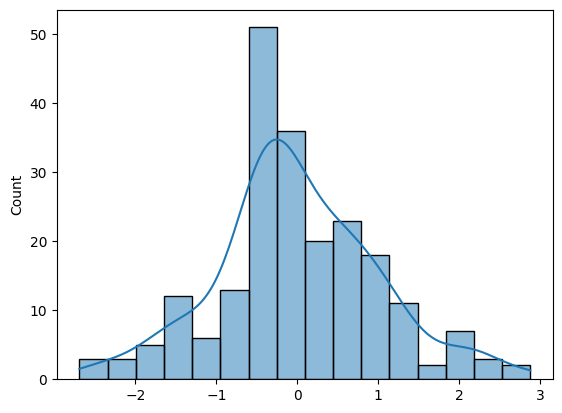

In [58]:
#to plot histogram with zscore and KDE=True means to have smooth curve for visualization
sns.histplot(z_score,kde=True)
sum(z_score)/len(z_score)


In [61]:
#creating a function for it.
def stdNBgraph(dataset):
    mean=dataset.mean()
    std=dataset.std()
    values=[]
    for i in dataset:
        values.append(i)
    values
    mean=dataset.mean()
    std=dataset.std()
    z_score=[]
    for j in values:
        z=(j-mean)/std
        z_score.append(z)
    sns.histplot(z_score,kde=True)
    sum(z_score)/len(z_score)



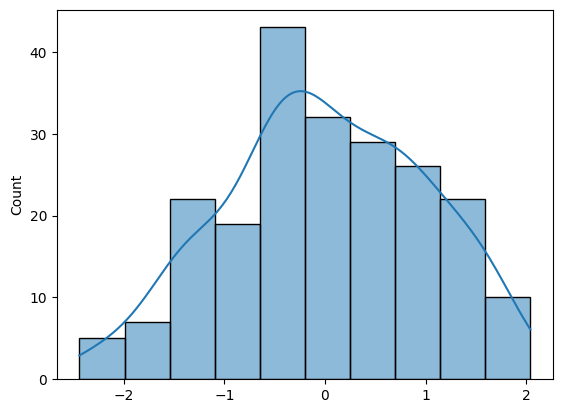

In [62]:
stdNBgraph(dataset["ssc_p"])

In [63]:
#creating a function for it.
def stdNBgraph(dataset):
    mean=dataset.mean()
    std=dataset.std()
    values=[ i for i in dataset]
    mean=dataset.mean()
    std=dataset.std()
    z_score=[((j-mean)/std) for j in values]
    sns.histplot(z_score,kde=True)
    sum(z_score)/len(z_score)

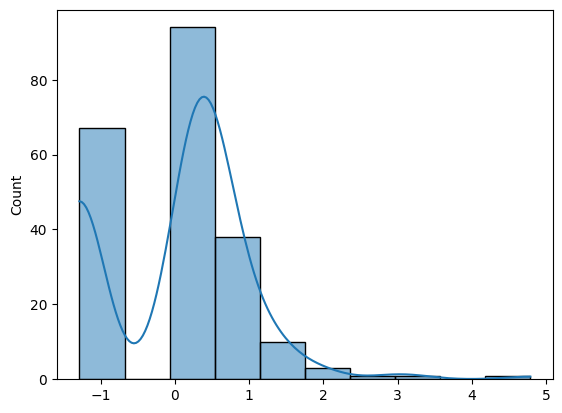

In [65]:
stdNBgraph(dataset["salary"])